In [15]:
import pandas as pd
from pandas_analysis import load_all_csv
import matplotlib.pyplot as plt

data = load_all_csv()
data['departure_date'] = pd.to_datetime(data['departure_date'])
data = data.drop_duplicates(subset=['flight_id', 'departure_date'])
unique_airlines = data['airline_iata_code'].unique()

In [16]:
def plot_airline_chart(airline_data, airline_code):
    grouped_data = airline_data.groupby(['arrival_airport_iata_code']).size().reset_index(name='count')
    ax = grouped_data.plot(x='arrival_airport_iata_code', y='count', kind='bar', figsize=(8, 6))
    plt.ylabel('Average number of Flights per Week')
    plt.xlabel('Destination IATA Code')
    plt.title(f'Average number of Flights per Week for {airline_code} by Destination')
    plt.show()

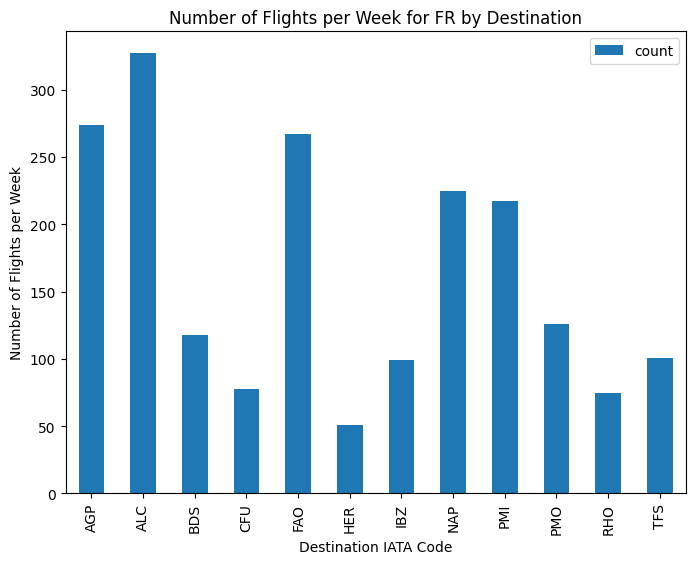

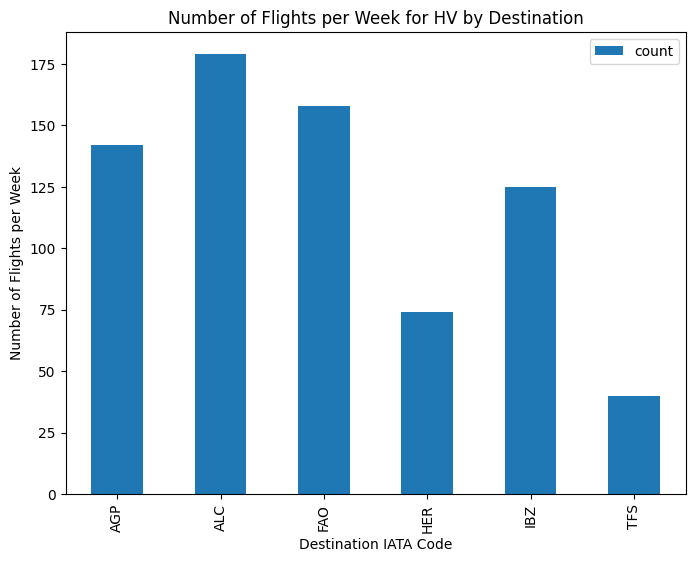

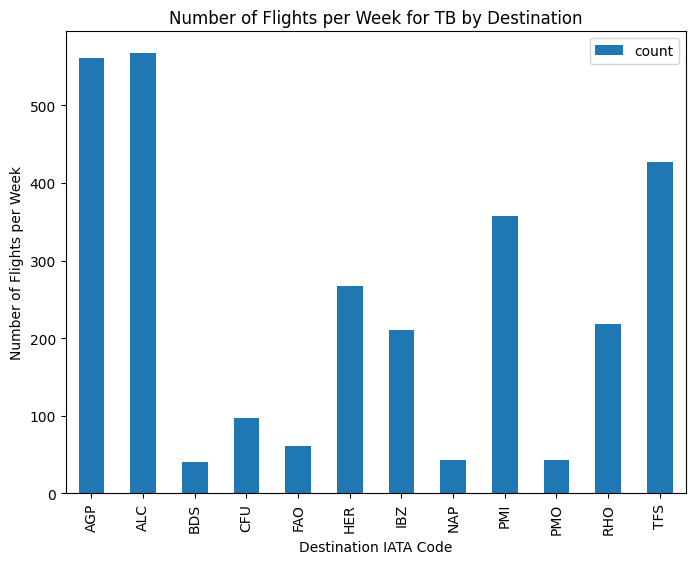

In [17]:
for airline_code in unique_airlines:
    airline_data = data[data['airline_iata_code'] == airline_code]
    plot_airline_chart(airline_data, airline_code)